In [79]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')


In [80]:
df = pd.read_csv('insurance_claims.csv')

In [81]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [82]:
df.replace('?', np.nan, inplace = True)

In [83]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [84]:
df.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [86]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [87]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [88]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [89]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [90]:
df.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [91]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [92]:
df.head()


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [93]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [94]:
cat_df = X.select_dtypes(include = ['object'])

In [95]:
cat_df.head()


,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [96]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [97]:
cat_df = pd.get_dummies(cat_df, drop_first = True)


In [98]:
cat_df.head()


,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [99]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [100]:
num_df.head()


,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [101]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [102]:
X.head()


,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,0,53300,0,5,1,1,2,...,False,True,False,False,False,False,False,True,True,True
1,228,42,2000,5000000,0,0,8,1,0,0,...,True,False,True,False,False,False,False,True,False,False
2,134,29,2000,5000000,35100,0,7,3,2,3,...,True,False,True,False,False,False,False,True,False,False
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,False,False,False,False,False,False,False,True,False,False
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,True,False,True,False,False,False,False,True,False,False


In [103]:
X.info()
X.nunique()
# X.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      1000 non-null   int64
 1   age                                     1000 non-null   int64
 2   policy_deductable                       1000 non-null   int64
 3   umbrella_limit                          1000 non-null   int64
 4   capital-gains                           1000 non-null   int64
 5   capital-loss                            1000 non-null   int64
 6   incident_hour_of_the_day                1000 non-null   int64
 7   number_of_vehicles_involved             1000 non-null   int64
 8   bodily_injuries                         1000 non-null   int64
 9   witnesses                               1000 non-null   int64
 10  total_claim_amount                      1000 non-null   int64
 11  injury_claim      

,0
months_as_customer,391
age,46
policy_deductable,3
umbrella_limit,11
capital-gains,338
capital-loss,354
incident_hour_of_the_day,24
number_of_vehicles_involved,4
bodily_injuries,3
witnesses,4


In [104]:
X.isna().sum()


,0
months_as_customer,0
age,0
policy_deductable,0
umbrella_limit,0
capital-gains,0
capital-loss,0
incident_hour_of_the_day,0
number_of_vehicles_involved,0
bodily_injuries,0
witnesses,0


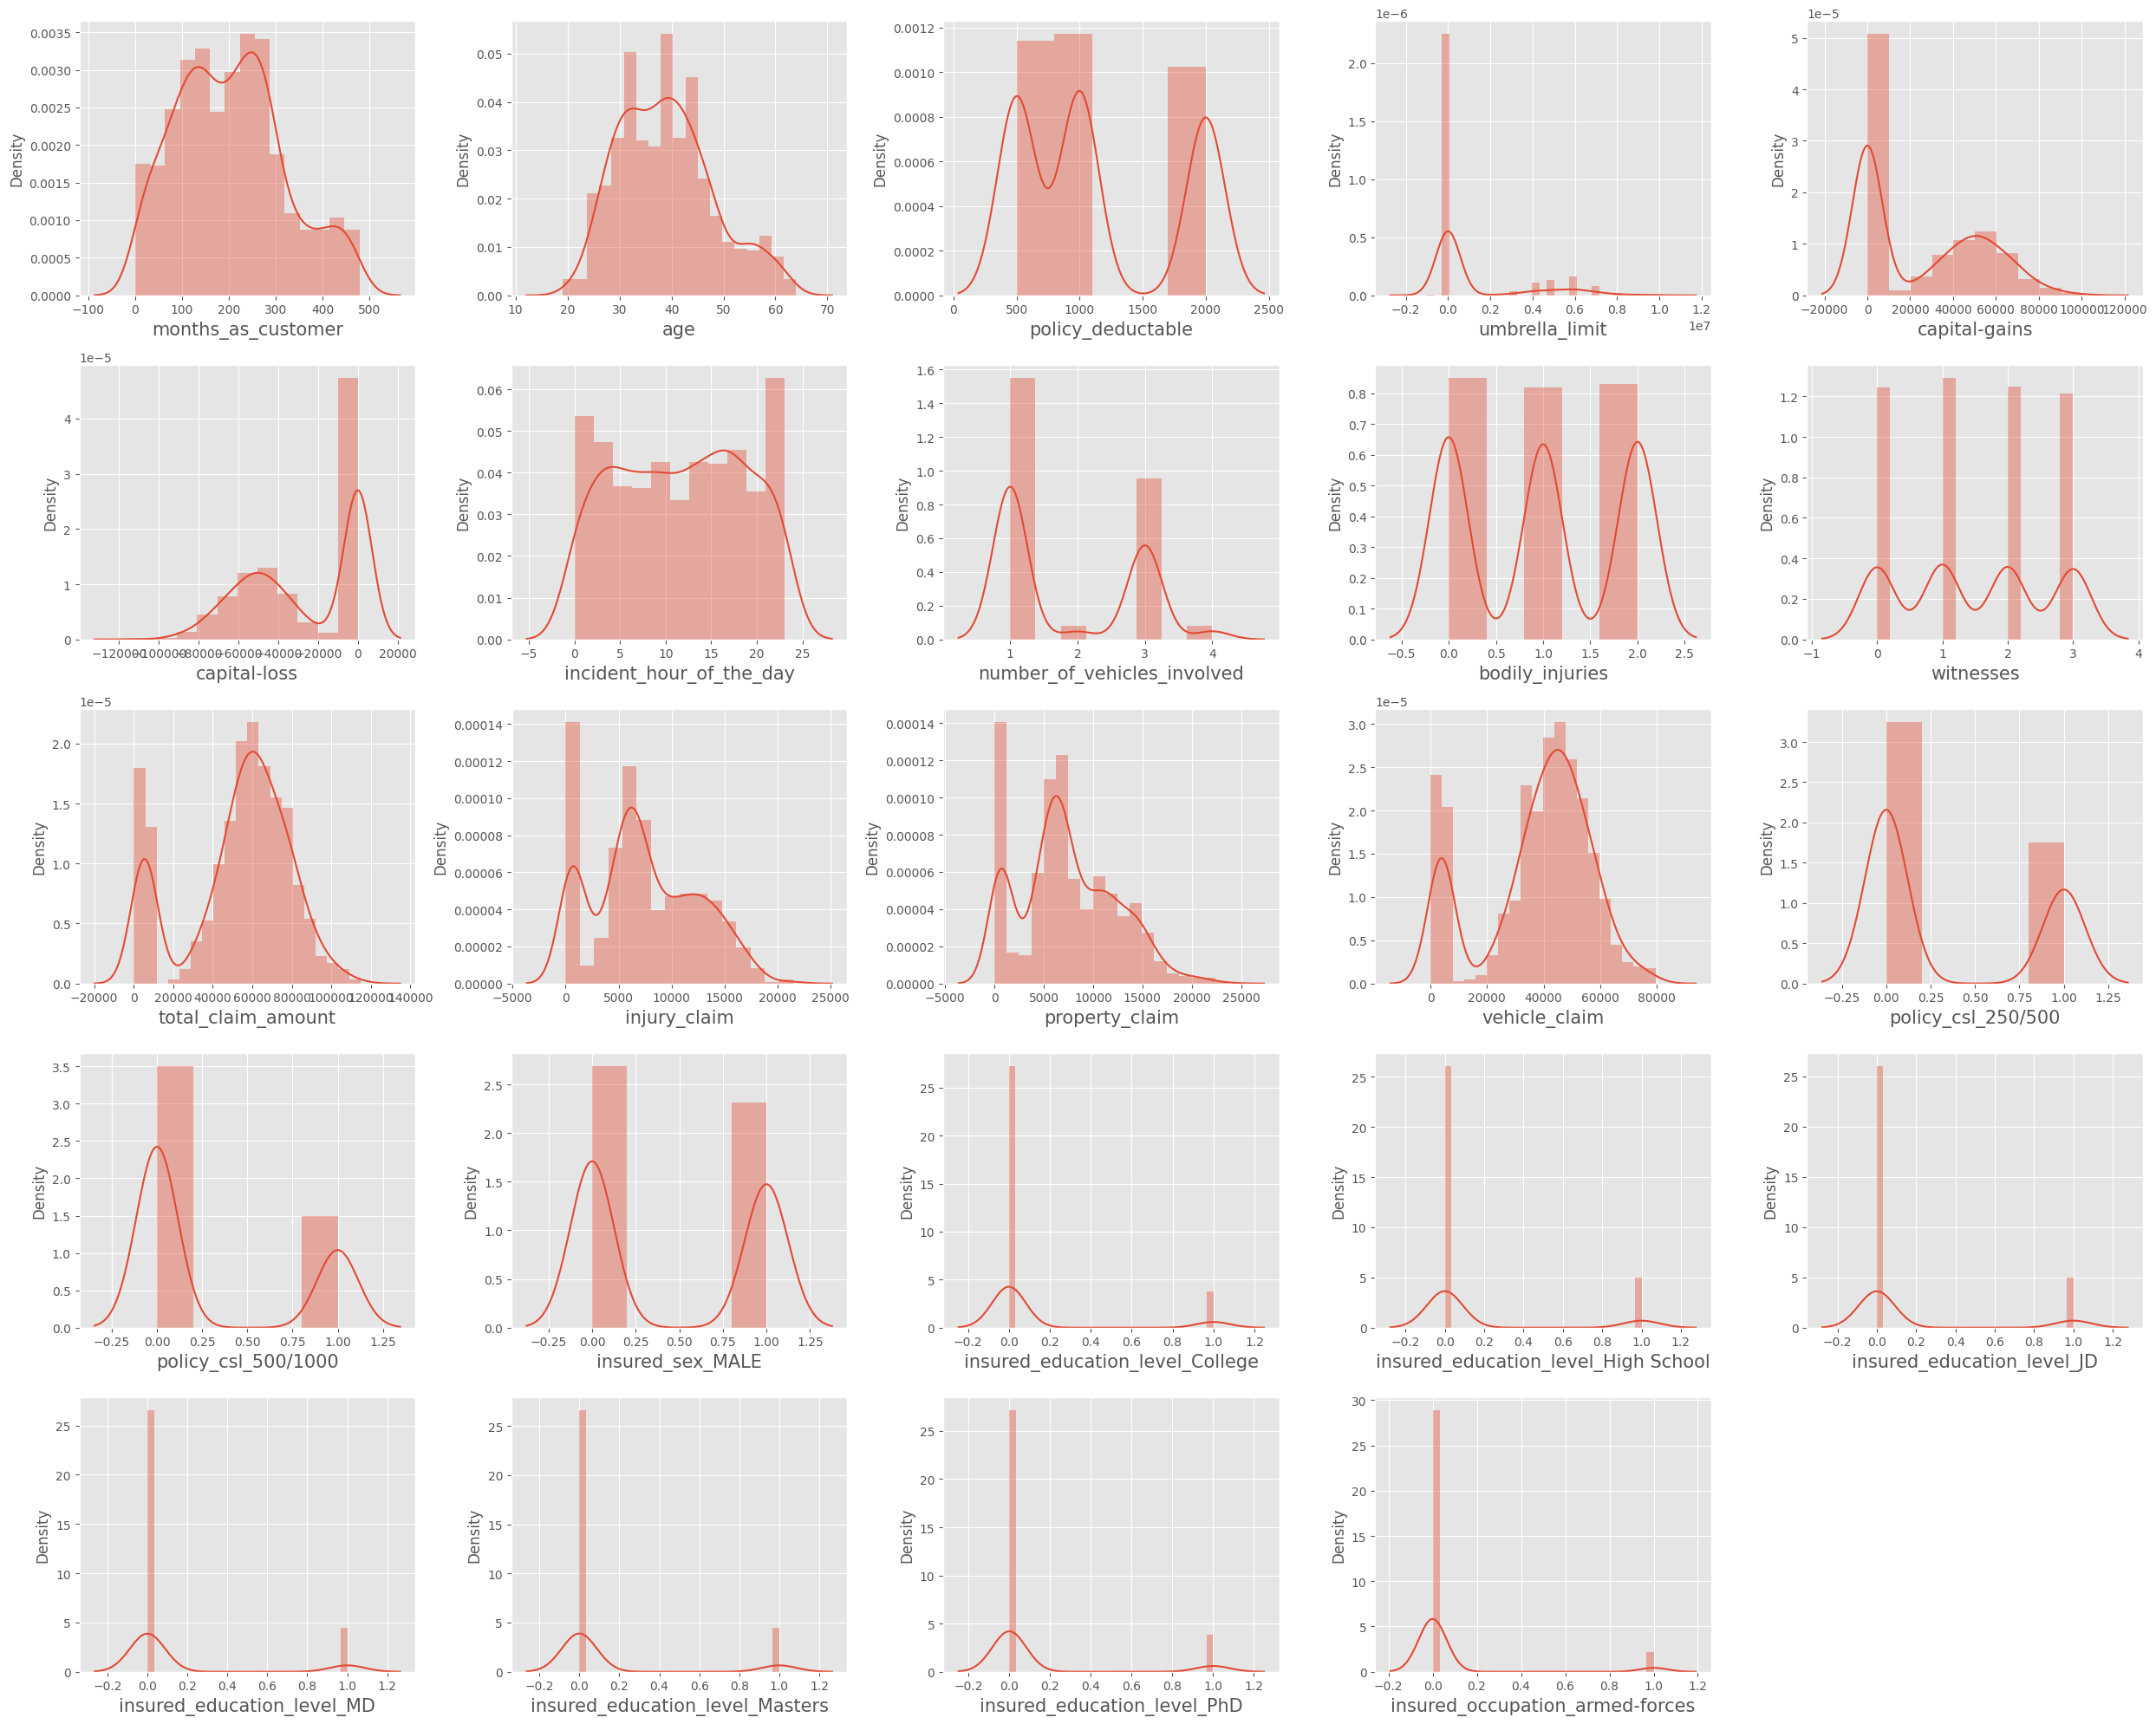

In [105]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

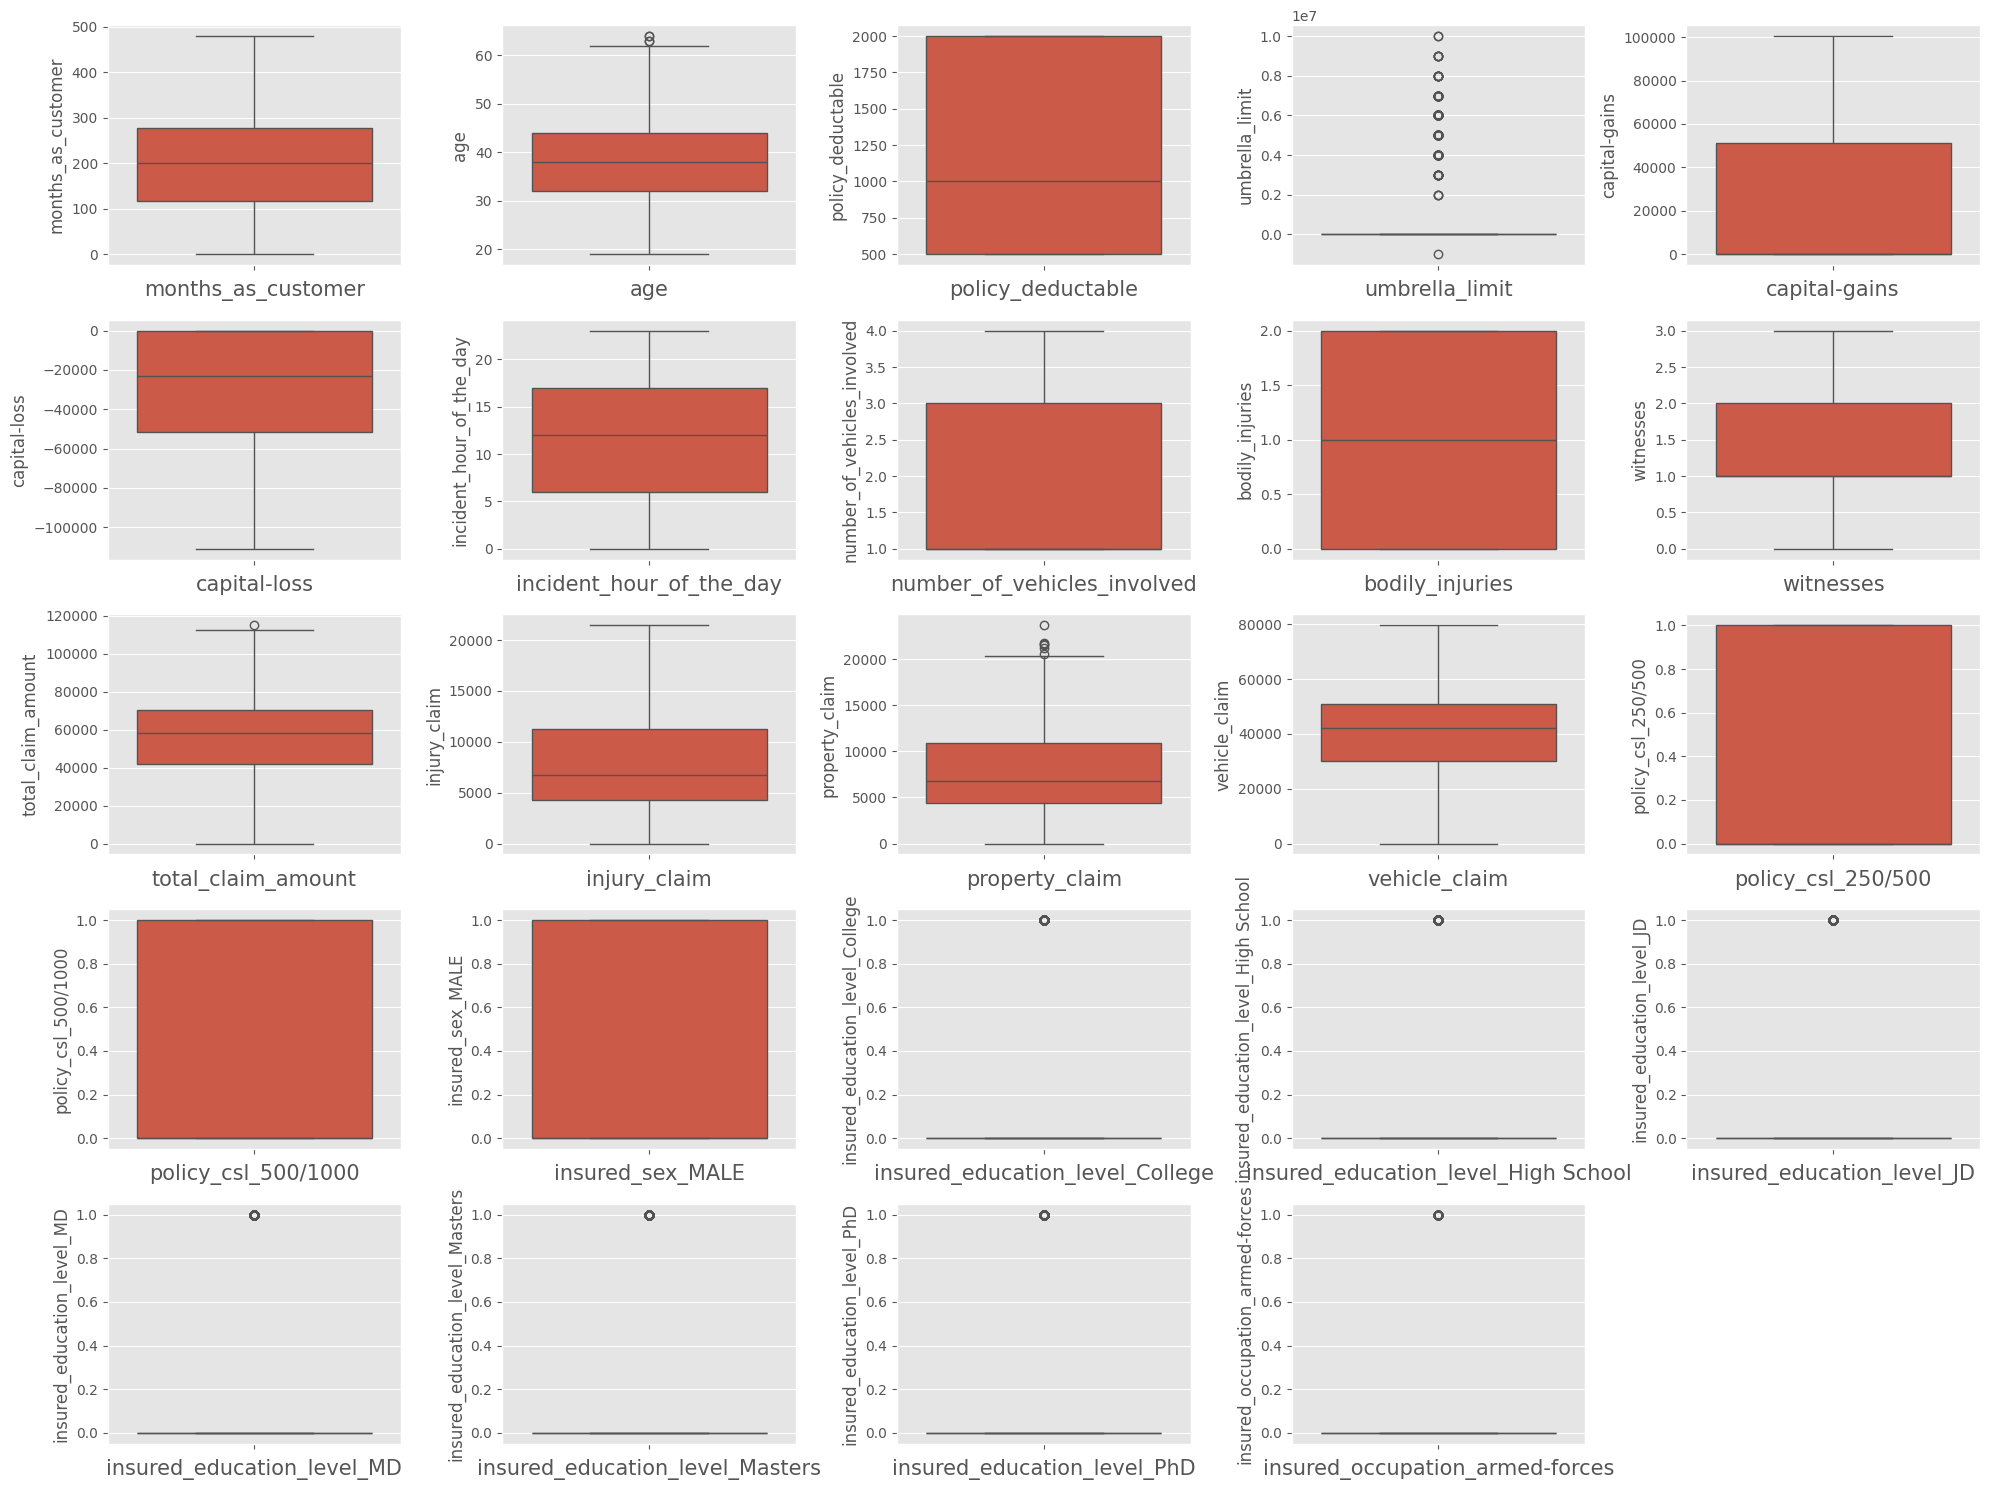

In [106]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [134]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [135]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [136]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [137]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 768 to 994
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           750 non-null    float64
 1   policy_deductable            750 non-null    float64
 2   umbrella_limit               750 non-null    float64
 3   capital-gains                750 non-null    float64
 4   capital-loss                 750 non-null    float64
 5   incident_hour_of_the_day     750 non-null    float64
 6   number_of_vehicles_involved  750 non-null    float64
 7   bodily_injuries              750 non-null    float64
 8   witnesses                    750 non-null    float64
 9   injury_claim                 750 non-null    float64
 10  property_claim               750 non-null    float64
 11  vehicle_claim                750 non-null    float64
dtypes: float64(12)
memory usage: 76.2 KB


In [138]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [139]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [143]:
# X_train.head()
X_test=X_test[X_train.columns]
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 357 to 370
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      250 non-null    int64
 1   policy_deductable                       250 non-null    int64
 2   umbrella_limit                          250 non-null    int64
 3   capital-gains                           250 non-null    int64
 4   capital-loss                            250 non-null    int64
 5   incident_hour_of_the_day                250 non-null    int64
 6   number_of_vehicles_involved             250 non-null    int64
 7   bodily_injuries                         250 non-null    int64
 8   witnesses                               250 non-null    int64
 9   injury_claim                            250 non-null    int64
 10  property_claim                          250 non-null    int64
 11  vehicle_claim         

In [113]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 750 entries, 769 to 912
Series name: fraud_reported
Non-Null Count  Dtype 
--------------  ----- 
750 non-null    object
dtypes: object(1)
memory usage: 11.7+ KB


In [132]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
356,0.224132,1.433738,-0.470013,1.430937,0.947727,0.344937,1.179545,-0.014655,-0.440766,0.826689,...,False,True,False,False,False,False,True,False,True,True
939,0.659668,1.433738,2.150877,1.270992,-0.147066,1.351563,1.179545,-0.014655,-1.339065,0.752903,...,True,False,False,False,False,False,True,False,False,False
594,-0.376907,-1.042019,-0.470013,-0.900706,-0.614226,0.201133,1.179545,1.206564,-0.440766,-0.001361,...,False,True,False,False,False,True,False,False,False,True
595,-1.282821,-1.042019,-0.470013,-0.900706,-0.079310,0.201133,-0.815176,-0.014655,0.457534,-1.522186,...,True,False,False,False,False,False,False,True,True,True
840,0.433189,1.433738,-0.470013,0.727179,0.947727,-0.374081,-0.815176,-1.235873,1.355834,-1.399208,...,True,False,False,False,True,False,False,True,False,False


In [144]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [145]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7373333333333333
Test accuracy of Support Vector Classifier is : 0.8
[[200   0]
 [ 50   0]]
              precision    recall  f1-score   support

           N       0.80      1.00      0.89       200
           Y       0.00      0.00      0.00        50

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.64      0.80      0.71       250



In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [147]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.736
Test accuracy of KNN is : 0.8
[[200   0]
 [ 50   0]]
              precision    recall  f1-score   support

           N       0.80      1.00      0.89       200
           Y       0.00      0.00      0.00        50

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.64      0.80      0.71       250



In [148]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [149]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.416
[[ 99 101]
 [ 45   5]]
              precision    recall  f1-score   support

           N       0.69      0.49      0.58       200
           Y       0.05      0.10      0.06        50

    accuracy                           0.42       250
   macro avg       0.37      0.30      0.32       250
weighted avg       0.56      0.42      0.47       250



In [150]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [151]:

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 4}
0.792


In [152]:
# best estimator

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [153]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8
Test accuracy of Decision Tree is : 0.796
[[157  43]
 [  8  42]]
              precision    recall  f1-score   support

           N       0.95      0.79      0.86       200
           Y       0.49      0.84      0.62        50

    accuracy                           0.80       250
   macro avg       0.72      0.81      0.74       250
weighted avg       0.86      0.80      0.81       250



In [154]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [155]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.968
Test accuracy of Random Forest is : 0.804
[[190  10]
 [ 39  11]]
              precision    recall  f1-score   support

           N       0.83      0.95      0.89       200
           Y       0.52      0.22      0.31        50

    accuracy                           0.80       250
   macro avg       0.68      0.58      0.60       250
weighted avg       0.77      0.80      0.77       250



In [157]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9253333333333333
Test Accuracy of Gradient Boosting Classifier is 0.388 

Confusion Matrix :- 
[[ 52 148]
 [  5  45]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.91      0.26      0.40       200
           Y       0.23      0.90      0.37        50

    accuracy                           0.39       250
   macro avg       0.57      0.58      0.39       250
weighted avg       0.78      0.39      0.40       250



In [158]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.924
Test Accuracy of Stochastic Gradient Boosting is 0.552 

Confusion Matrix :- 
[[101  99]
 [ 13  37]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.89      0.51      0.64       200
           Y       0.27      0.74      0.40        50

    accuracy                           0.55       250
   macro avg       0.58      0.62      0.52       250
weighted avg       0.76      0.55      0.59       250



In [160]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 53.2 MB/s eta 0:00:01Installing collected packages: catboost


In [161]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5053455	total: 56.3ms	remaining: 507ms
1:	learn: 0.4534280	total: 62.5ms	remaining: 250ms
2:	learn: 0.4289341	total: 67.5ms	remaining: 157ms
3:	learn: 0.4047771	total: 71.2ms	remaining: 107ms
4:	learn: 0.3960112	total: 75.9ms	remaining: 75.9ms
5:	learn: 0.3777972	total: 79.6ms	remaining: 53.1ms
6:	learn: 0.3598946	total: 84.2ms	remaining: 36.1ms
7:	learn: 0.3419777	total: 88.5ms	remaining: 22.1ms
8:	learn: 0.3252973	total: 92ms	remaining: 10.2ms
9:	learn: 0.3160729	total: 95.6ms	remaining: 0us


In [162]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.8746666666666667
Test Accuracy of Cat Boost Classifier is 0.744 

Confusion Matrix :- 
[[150  50]
 [ 14  36]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.91      0.75      0.82       200
           Y       0.42      0.72      0.53        50

    accuracy                           0.74       250
   macro avg       0.67      0.73      0.68       250
weighted avg       0.82      0.74      0.77       250



In [163]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.804 

Confusion Matrix :- 
[[187  13]
 [ 36  14]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.84      0.94      0.88       200
           Y       0.52      0.28      0.36        50

    accuracy                           0.80       250
   macro avg       0.68      0.61      0.62       250
weighted avg       0.77      0.80      0.78       250



In [164]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1661
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262667 -> initscore=-1.032154
[LightGBM] [Info] Start training from score -1.032154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [165]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),  ('Gradient Boosting Classifier', gb), ('SGB', sgb),('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5053455	total: 5.94ms	remaining: 53.5ms
1:	learn: 0.4534280	total: 16.1ms	remaining: 64.6ms
2:	learn: 0.4289341	total: 20.5ms	remaining: 47.9ms
3:	learn: 0.4047771	total: 30.5ms	remaining: 45.7ms
4:	learn: 0.3960112	total: 39.1ms	remaining: 39.1ms
5:	learn: 0.3777972	total: 43.9ms	remaining: 29.3ms
6:	learn: 0.3598946	total: 53.8ms	remaining: 23ms
7:	learn: 0.3419777	total: 57.8ms	remaining: 14.4ms
8:	learn: 0.3252973	total: 67.9ms	remaining: 7.54ms
9:	learn: 0.3160729	total: 76.5ms	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1661
[LightGBM] [Info] Number of data points in the train 

In [166]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9346666666666666
Test accuracy of Voting Classifier is : 0.808
[[184  16]
 [ 32  18]]
              precision    recall  f1-score   support

           N       0.85      0.92      0.88       200
           Y       0.53      0.36      0.43        50

    accuracy                           0.81       250
   macro avg       0.69      0.64      0.66       250
weighted avg       0.79      0.81      0.79       250



In [167]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM',  'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc,  vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,Voting Classifier,0.808
3,Random Forest,0.804
7,Extra Trees,0.804
0,SVC,0.800
1,KNN,0.800
2,Decision Tree,0.796
8,LGBM,0.788
6,Cat Boost,0.744
5,SGB,0.552
4,Gradient Boost,0.388
